<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/W9_ANN_Detection_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt


In [72]:
from google.colab import drive
folder = '/content/drive/MyDrive/cifar100_tu_w9.hs5/tongHop'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('phong'):
    output = 0
  elif file.startswith('chi'):
    output = 1
  elif file.startswith('TUAN'):
    output = 2
  elif file.startswith('BINH'):
    output = 3
  elif file.startswith('NHuy'):
    output = 4
  elif file.startswith('Tri'):
    output = 5
  elif file.startswith('Tu'):
    output = 6   
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [73]:
!cp photos.npy "/content/drive/MyDrive/cifar100_tu_w9.hs5"
!cp labels.npy "/content/drive/MyDrive/cifar100_tu_w9.hs5"

In [75]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/cifar100_tu_w9.hs5/photos.npy')
labels = np.load('/content/drive/MyDrive/cifar100_tu_w9.hs5/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [76]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (334, 30, 40, 3)
x_test shape:  (144, 30, 40, 3)
y_train shape:  (334,)
y_test shape:  (144,)


In [77]:
x_train = x_train.reshape(334, 30, 40, 3)
x_test = x_test.reshape(144, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [78]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [79]:
(y_train.shape),(y_test.shape)

((334, 7), (144, 7))

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 19, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 14, 19, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 17, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 12, 17, 64)        0         
                                                      

In [82]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 2s 32ms/step - loss: 1.9306 - accuracy: 0.2036 - val_loss: 1.8850 - val_accuracy: 0.2431
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 1.8655 - accuracy: 0.2725 - val_loss: 1.7994 - val_accuracy: 0.5278
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 1.6199 - accuracy: 0.3862 - val_loss: 1.3508 - val_accuracy: 0.5903
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 1.2845 - accuracy: 0.5269 - val_loss: 0.8027 - val_accuracy: 0.8472
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 0.8260 - accuracy: 0.7006 - val_loss: 0.5079 - val_accuracy: 0.8889
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6387 - accuracy: 0.7395 - val_loss: 0.3639 - val_accuracy: 0.9375
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4267 - accuracy: 0.8533 - val_loss: 0.2306 - val_accuracy: 0.9444
Epoch 

In [83]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018596267327666283
Test accuracy: 0.9930555820465088


In [84]:
model.save('/content/drive/MyDrive/demo_detection_face.hs5')

In [85]:
labels = ['phong', 'chi', 'TUAN', 'BINH', 'NHuy', 'Tri', 'Tu']

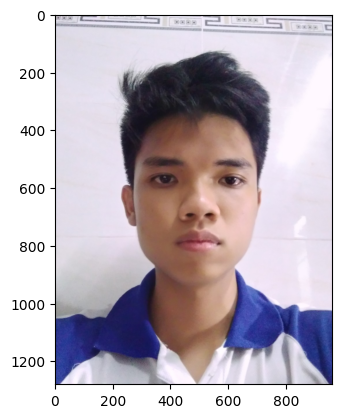

In [86]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/demo_detection_face.hs5/tu1.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 89ms/step
Tu


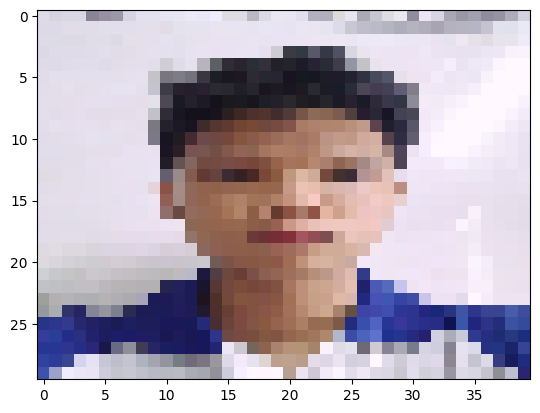

In [87]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/demo_detection_face.hs5/tu1.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

In [88]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/demo_detection_face.hs5')


1/1 [==============================] - 0s 139ms/step
Tu


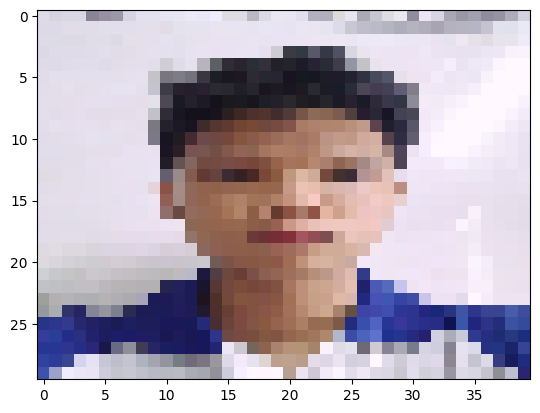

In [89]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/demo_detection_face.hs5/tu1.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

1/1 [==============================] - 0s 85ms/step
Tu


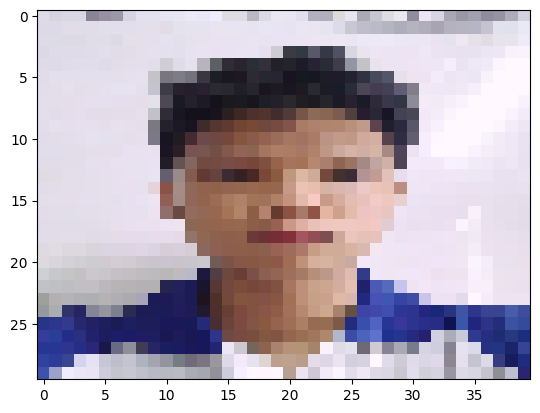

In [90]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/demo_detection_face.hs5')
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/demo_detection_face.hs5/tu1.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)


1/1 [==============================] - 0s 48ms/step
TUAN


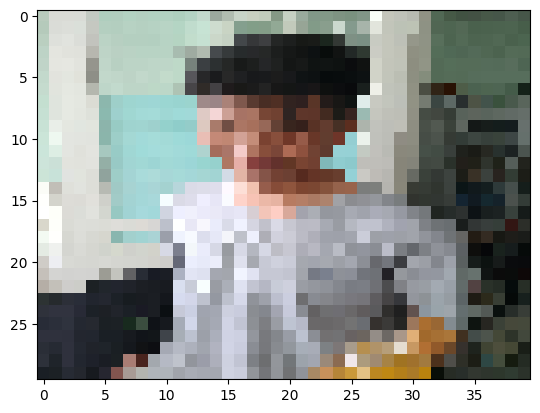

In [91]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/demo_detection_face.hs5/tu.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

1/1 [==============================] - 0s 66ms/step
BINH


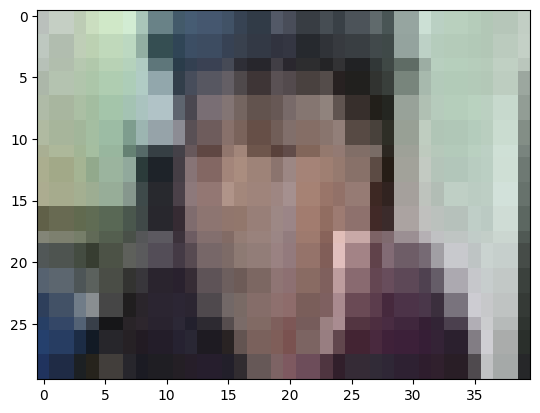

In [92]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/demo_detection_face.hs5/binh.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)